# Boston Housing Data Analysis & Machine Learning 

## Introduction

In the development of AI there are four steps. This notebook focuses on the third step. Predictions. 
With no previous experience or knowledge in the field of AI it is a difficult task to start. 
The goal of this exercise is getting familair with the working environment and understanding the basics of data analysis and machine learning. 
Hence this notebook will be based on an existing one from kaggle.

https://www.kaggle.com/mohitgoyal522/boston-housing-data-analysis-machine-learning

The dataset contains information collected by the U.S. Census Service concerning housing in the area of Boston, Massachusetts.

Each case of the dataset contains 14 attributes:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise) 
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per 10,000 Dollars
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in 1000's Dollars

Variable #14 is censored at 50.00 (corresponding to a median price of 50,000 Dollars). This is suggested by the fact that the highest median price of exactly 50,000 Dollars is reported in 16 cases, while 15 cases have prices between 40,000 and 50,000 Dollars, with prices rounded of to the nearest hundred.

The goal is to select the variables which predicts the MEDV. And in addition to that suggest a machine learning model to predict MEDV.

## Importing libraries and data

In [1]:
#import libraries
import numpy as np #used for mathematical functions
import pandas as pd #used for data
import matplotlib #plotting library
import seaborn as sns
import sklearn as sk
import statsmodels.api as sm
print('numpy version:', np.__version__)
print('pandas version:', pd.__version__)
print('scikit-learn version:', sk.__version__)
print('matplotlib version:', matplotlib.__version__)

numpy version: 1.20.1
pandas version: 1.2.4
scikit-learn version: 0.24.1
matplotlib version: 3.3.4


In [2]:
#importing datasets
#pc /Users/matt/Desktop/
#laptop /Users/Matt/OneDrive/
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataset = pd.read_csv('/Users/matt/Desktop/AI/PersonalNotebooks/ML/BostonHousing/housing.csv',
                      delimiter=r'\s+', names=column_names)

In [3]:
#display top 5 rows of dataset
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
#display last 5 rows of dataset
dataset.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


In [5]:
#display shape of dataset (rows, colums)
print("The shape of the data set: {}".format(dataset.shape))

The shape of the data set: (506, 14)


## Treating the dataset

In [6]:
#describe dataset to display distribution of data
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000




The distribution displays that:
1. Variable 'ZN' is 0 for the 25h and 50th percentile. This will result in skewed data. This is because 'ZN' is a conditional variable
2. Comparable for variable 'CHAS' its the 25th, 50th and 75th percentile. This is a result of 'CHAS' being categorical data, only containing values 1 and 0.

In addition to that an important fact that can be derived from the dataset is that the max value of 'MEDV' corresponds to 50. This goes along with the original description which states: "Variable #14 is censored at 50.00 (corresponding to a median price of 50,000 Dollars)"

For a start we can assume the variables 'ZN' and 'CHAS' may be removed as they will not be useful in predicting MEDV. And might even result in a biased model.

In [7]:
#removing variables from data
dataset = dataset.drop(['ZN', 'CHAS'], axis=1)

In [8]:
dataset.head()

,CRIM,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,2.31,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,7.07,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,7.07,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,2.18,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,2.18,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### Null values

In [9]:
dataset.isnull().sum()

CRIM       0
INDUS      0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

There are no null values in this dataset.

### Outliers in the data

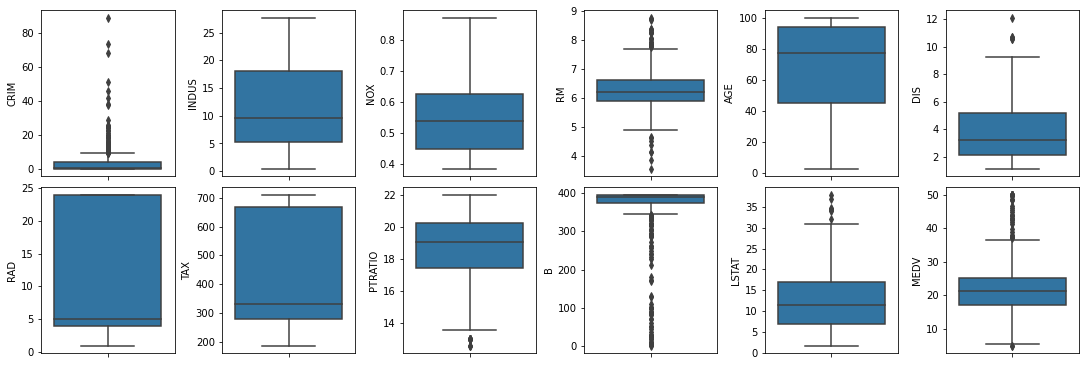

In [10]:
#Plotting boxplots to check for outliers in the data (considering data between the 25th and 75th percentile as non outlier)
from matplotlib import pyplot as plt
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(15, 5))
ax = ax.flatten()
index = 0
for i in dataset.columns:
    sns.boxplot(y=i, data=dataset, ax=ax[index])
    index+=1
plt.tight_layout(pad=0.4)
plt.show()

From this we can deduce that colums CRIM, RM, DIS, PTRATIO, B, LSTAT and MEDV have outliers.

In [11]:
#checking percentage / amount of outliers
for i in dataset.columns:
    dataset.sort_values(by=i, ascending=True, na_position='last')
    q1, q3 = np.nanpercentile(dataset[i], [25,75])
    iqr = q3-q1
    lower_bound = q1-(1.5*iqr)
    upper_bound = q3+(1.5*iqr)
    outlier_data = dataset[i][(dataset[i] < lower_bound) | (dataset[i] > upper_bound)] #creating the series of outliers
    perc = (outlier_data.count()/dataset[i].count())*100
    print('Outliers in %s is %.2f%% with count %.f' %(i, perc, outlier_data.count()))
    if i == 'B':
        outlierDataB_index = outlier_data.index
        outlierDataB_LB = dataset[i][(dataset[i] < lower_bound)]
        outlierDataB_UB = dataset[i][(dataset[i] > upper_bound)]
    elif i == 'CRIM':
        outlierDataCRIM_index = outlier_data.index
        outlierDataCRIM_LB = dataset[i][(dataset[i] < lower_bound)]
        outlierDataCRIM_UB = dataset[i][(dataset[i] > upper_bound)]
    elif i == 'MEDV':
        lowerBoundMEDV = lower_bound
        upperBoundMEDV = upper_bound

Outliers in CRIM is 13.04% with count 66
Outliers in INDUS is 0.00% with count 0
Outliers in NOX is 0.00% with count 0
Outliers in RM is 5.93% with count 30
Outliers in AGE is 0.00% with count 0
Outliers in DIS is 0.99% with count 5
Outliers in RAD is 0.00% with count 0
Outliers in TAX is 0.00% with count 0
Outliers in PTRATIO is 2.96% with count 15
Outliers in B is 15.22% with count 77
Outliers in LSTAT is 1.38% with count 7
Outliers in MEDV is 7.91% with count 40


The percentage of outliers in CRIM and B is high. This may affect the accuracy of the model.

These values can either be dropped from the table or replaced by a median value. Dropping all the outlier data may not be a good idea, fewer observations due to higher percentage of outliers might have impact on the model. Also replacing a big percentage of outliers by a median might result in a less acurate model.

To get the best of both, the most extreme cases of outliers will be dropped. The rest will be replaced by a median.

### Removing outliers

In [12]:
#copy dataset for ease of use
dataset2 = dataset.copy()

In [13]:
#removing all extreme outliers from B and CRIM
removed = []
outlierDataB_LB.sort_values(ascending=True, inplace=True)
outlierDataB_UB.sort_values(ascending=False, inplace=True)
counter = 1
for i in outlierDataB_LB.index:
    if counter <=19:
        dataset2.drop(index=i, inplace=True)
        counter+=1
        removed.append(i)
for i in outlierDataB_UB.index:
    if counter <= 38:
        dataset2.drop(index=i, inplace=True)
        counter+=1
        removed.append(i)
for i in outlierDataB_LB.index:
    if counter<=38 and i not in removed:
        dataset2.drop(index=i, inplace=True)
        counter+=1
        removed.append(i)

outlierDataCRIM_LB.sort_values(ascending=True, inplace=True)
outlierDataCRIM_UB.sort_values(ascending=False, inplace=True)
counter=1
for i in outlierDataCRIM_LB.index:
    if counter<=16 and i not in removed:
        dataset2.drop(index=i, inplace=True)
        counter+=1
        removed.append(i)
for i in outlierDataCRIM_UB.index:
    if counter<=33 and i not in removed:
        dataset2.drop(index=i, inplace=True)
        counter+=1
        removed.append(i)
for i in outlierDataCRIM_LB.index:
    if counter<=33 and i not in removed:
        dataset2.drop(index=i, inplace=True)
        counter+=1
        removed.append(i)
        
dataset2.shape


(435, 12)

71 observations have been dropped. The dataset now contains 435 observations and 12 columns.

Next step will be replacing the remaining outliers with a median.

In [14]:
dataset3 = dataset2.copy()

In [15]:
for i in dataset.columns:
    dataset.sort_values(by=i, ascending=True, na_position='last')
    q1, q3 = np.nanpercentile(dataset[i], [25,75])
    iqr = q3-q1
    lower_bound = q1-(1.5*iqr)
    upper_bound = q3+(1.5*iqr)
    mean = dataset3[i].mean()
    if i != 'MEDV':
        dataset3.loc[dataset3[i] < lower_bound, [i]] = mean
        dataset3.loc[dataset3[i] > upper_bound, [i]] = mean
    else:
        dataset3.loc[dataset3[i] < lower_bound, [i]] = mean
        dataset3.loc[dataset3[i] > upper_bound, [i]] = 50

In [16]:
dataset3.describe()

,CRIM,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000
mean,1.054293,10.008575,0.534257,6.266477,64.741609,4.038049,7.409195,369.232184,18.402521,388.243160,11.128671,24.502299
std,1.936962,6.741091,0.108957,0.511640,28.319794,1.960932,7.185681,146.359443,1.945860,10.759893,5.973657,9.616602
min,0.006320,0.460000,0.385000,4.903000,2.900000,1.129600,1.000000,187.000000,13.600000,344.910000,1.730000,6.300000
25%,0.068740,4.860000,0.445000,5.926500,40.050000,2.404500,4.000000,276.000000,17.400000,382.557563,6.545000,18.900000
50%,0.173310,8.140000,0.515000,6.230000,70.200000,3.665000,5.000000,307.000000,18.600000,392.520000,9.970000,22.200000
75%,0.846290,18.100000,0.585000,6.550500,91.550000,5.400900,6.000000,403.000000,20.200000,396.260000,14.655000,27.100000
max,8.982960,27.740000,0.871000,7.691000,100.000000,9.222900,24.000000,711.000000,22.000000,396.900000,30.810000,50.000000


## Selecting the best features for MEDV prediction

#### using p-Value to select the optimal features:
Dropping all variables whose p-value is less than 0.05 using backward elimination.

In [17]:
#independent variable(X) and dependent variable(Y)
X = dataset3.iloc[:, :-1]
Y = dataset3.iloc[:, 11]

In [18]:
#feature selection using P-Value/ Backward elimination
def BackwardElimination(sl, w):
    for i in range(0, len(w.columns)):
        regressor_OLS = sm.OLS(endog=Y, exog=w).fit()
        max_pvalue = max(regressor_OLS.pvalues)
        pvalues = regressor_OLS.pvalues
        if max_pvalue > SL:
            index_max_pvalue = pvalues[pvalues==max_pvalue].index
            w = w.drop(index_max_pvalue, axis=1)
    return w, pvalues, index_max_pvalue

SL = 0.05
ones = np.ones((435,1)) #adding a column of 1 to X as it is required by statsmodel library
W = X
W.insert(0, 'Constant', ones, True)
W_optimal = W.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11]]

W_optimal, pvalues, index_max_pvalue = BackwardElimination(SL, W_optimal)
X = W_optimal.drop('Constant', axis=1)

In [19]:
X.columns

Index(['NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT'], dtype='object')

### Applying pearson correlation to remove any highly correlated independent variables to avoid multicollinearity

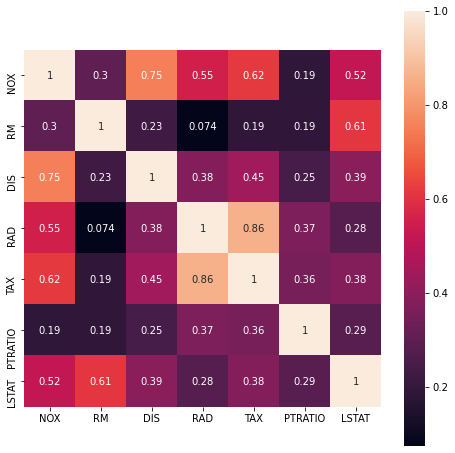

In [20]:
#Ploting heatmap using pearson correlation among independent variables
from scipy.stats import pearsonr
plt.figure(figsize=(8, 8))
ax = sns.heatmap(X.corr(method='pearson').abs(), annot=True, square=True)
plt.show()

From the heatmap above we can correlate that:

1. TAX and RAD are highly correlated with a score of 0.86. RAD (index of accessibility to radial highways) might be more important in predicting MEDV than TAX (full-value property-tax rate per 10.000 Dollars).
2. DIS and NOX have a high correlation with a score of 0.75. DIS (weighted distances to five boston employment centres) might be more important in predicting MEDV than NOX (nitric oxides concentration(parts per 10million))

In both these cases the attribute with lowest importance will be dropped from the table.

In [21]:
#dropping TAX and NOX
X.drop('TAX', axis=1, inplace=True)
X.drop('NOX', axis=1, inplace=True)

X.columns

Index(['RM', 'DIS', 'RAD', 'PTRATIO', 'LSTAT'], dtype='object')

#### Checking correlation of remaining independent variables with MEDV using pearson correlation method

In [22]:
for i in X.columns:
    corr, _= pearsonr(X[i], Y)
    print(i, corr)

RM 0.5619541568173061
DIS 0.10793693577397612
RAD -0.16919893157675941
PTRATIO -0.38055803676641997
LSTAT -0.6793276769216395


DIS and RAD are closest to 0, thus they are the least correlated. They will be dropped from the table

In [23]:
X.drop(['RAD', 'DIS'], axis=1, inplace=True)

In [24]:
#remaining attributes that can predict MEDV
X.columns

Index(['RM', 'PTRATIO', 'LSTAT'], dtype='object')

With this information we can assume RM, PTRATIO and LSTAT predict MEDV the best.

## Machine Learning

The following is a regression problem as we have to predict a continious (non-categorical) value.

The next step is implementing regression machine learning models to the dataset (using the remaining independent variables) for MEDV prediction.

In [25]:
#splitting data into training set and test set
from sklearn.model_selection import train_test_split as tts
X_train, X_test, Y_train, Y_test = tts(X, Y, test_size=0.2, random_state=0)
X_test.head()

,RM,PTRATIO,LSTAT
158,6.066,14.7,6.43
269,5.920,18.6,13.65
54,5.888,21.1,14.80
360,6.398,20.2,7.79
499,5.569,19.2,15.10


#### Linear regression model

In [26]:
from sklearn.linear_model import LinearRegression as lr
linear = lr()
linear.fit(X_train, Y_train)
Y_pred = linear.predict(X_test)
Y_compare_linear = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
Y_compare_linear.head(5)

,Actual,Predicted
158,24.3,30.992768
269,20.7,21.073716
54,18.9,17.575853
360,25.0,25.980258
499,17.5,17.814795


#### Polynomial regression model:

In [27]:
from sklearn.preprocessing import PolynomialFeatures
polyRegressor = PolynomialFeatures(degree = 3)
X_train_poly = polyRegressor.fit_transform(X_train)
X_test_poly = polyRegressor.fit_transform(X_test)
poly = lr()
poly.fit(X_train_poly, Y_train)
Y_pred = poly.predict(X_test_poly)
Y_compare_poly = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
Y_compare_poly.head(5)

,Actual,Predicted
158,24.3,32.860285
269,20.7,19.674236
54,18.9,15.952153
360,25.0,23.712803
499,17.5,18.331182


#### Support vector regression model:

In [28]:
from sklearn.svm import SVR
svr = SVR(kernel='poly', gamma='scale') #set options
svr.fit(X_train, Y_train) #fit the training data both X and Y
Y_pred = svr.predict(X_test) #predict result
Y_compare_svr = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
Y_compare_svr.head(5)

,Actual,Predicted
158,24.3,26.297366
269,20.7,19.596855
54,18.9,15.838815
360,25.0,24.115036
499,17.5,17.335738


#### Decision tree regression model:

In [29]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100) #set options
rf.fit(X_train, Y_train) #fit the training data
Y_pred = rf.predict(X_test)
Y_compare_randomforrest = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
Y_compare_randomforrest.head(5)

,Actual,Predicted
158,24.3,22.017
269,20.7,22.225
54,18.9,17.877
360,25.0,24.669
499,17.5,20.620


#### K-Nearest Neighbour regression model:

In [30]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 13)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
Y_compare_knn = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
Y_compare_knn.head()

,Actual,Predicted
158,24.3,30.530769
269,20.7,20.346154
54,18.9,18.646154
360,25.0,22.384615
499,17.5,19.315385


### Plotting comparison of actual and predicted MEDV data obtained using different machine learning models

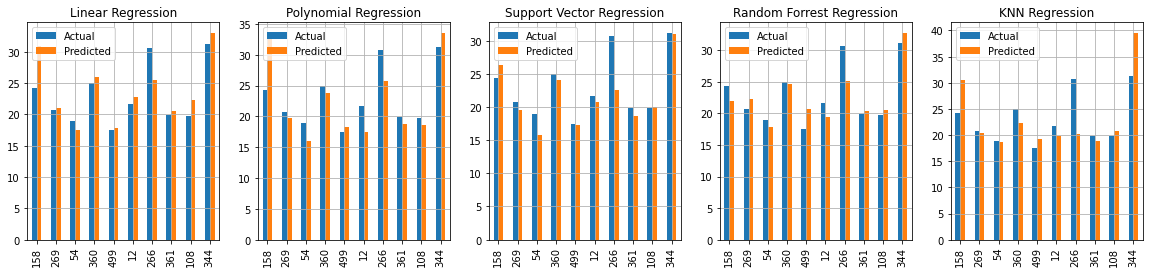

In [31]:
fig, ax = plt.subplots(ncols=5, nrows=1, figsize=(20, 4))
ax= ax.flatten()
Y_compare_linear.head(10).plot(kind='bar', title='Linear Regression', grid=True, ax=ax[0])
Y_compare_poly.head(10).plot(kind='bar', title='Polynomial Regression', grid=True, ax=ax[1])
Y_compare_svr.head(10).plot(kind='bar', title='Support Vector Regression', grid=True, ax=ax[2])
Y_compare_randomforrest.head(10).plot(kind='bar', title='Random Forrest Regression', grid=True, ax=ax[3])
Y_compare_knn.head(10).plot(kind='bar', title='KNN Regression', grid=True, ax=ax[4])
plt.show()

###  R2 of machine learning models using K-fold cross validation

In [32]:
from sklearn.model_selection import cross_val_score as cvs
print('According to the Rsquared scoring method the machine learning models scored as follows:')
modelNames = ['Linear', 'Polynomial', 'Support Vector', 'Random Forrest', 'K-Nearest Neighbor']
modelRegressors = [linear, poly, svr, rf, knn]
models = pd.DataFrame({'modelNames': modelNames, 'modelRegressors': modelRegressors})
counter = 0
score = []
acc = []

for i in models['modelRegressors']:
    if i is poly:
        accuracy = cvs(i, X_train_poly, Y_train, scoring='r2', cv=5)
        print('Accuracy of %s Regression model is %.2f' %(models.iloc[counter, 0], accuracy.mean()))
        score.append(accuracy.mean())
        acc_i = round(i.score(X_train_poly, Y_train), 3)
        acc.append(acc_i)    
    else:
        accuracy = cvs(i, X_train, Y_train, scoring='r2', cv=5)
        print('Accuracy of %s Regression model is %.2f' %(models.iloc[counter, 0], accuracy.mean()))
        score.append(accuracy.mean())
        acc_i = round(i.score(X_train, Y_train), 3)
        acc.append(acc_i)    
    counter+=1

According to the Rsquared scoring method the machine learning models scored as follows:
Accuracy of Linear Regression model is 0.51
Accuracy of Polynomial Regression model is 0.64
Accuracy of Support Vector Regression model is 0.50
Accuracy of Random Forrest Regression model is 0.72
Accuracy of K-Nearest Neighbor Regression model is 0.64


<AxesSubplot:>

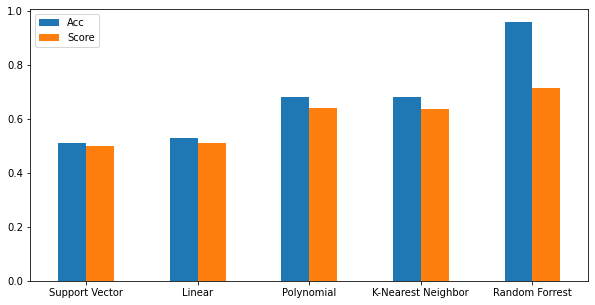

In [33]:
#pd.DataFrame({'Model Name': modelNames,'Score': score}).sort_values(by='Score', 
#ascending=True).plot(x=0, y=1, kind='bar', figsize=(15,5), 
#title='Comparison of Rsquared scores on ML models' )

#plt.show()

df = pd.DataFrame({'Acc': acc,'Score': score}, index=modelNames).sort_values(by='Acc', ascending=True)
df.plot.bar(rot=0, figsize=[10,5], by='Acc')

From the graph we can deduce that the Random Forrest machine learning model scores best with an R2 of 0.72
This means that this model should be used to predict MEDV the best.

However, the KNN & Polynomial models also have respectable scores. Thus these can also be used to predict MEDV, but with lesser accuracy.

## Conclusion

#### By applying data engineering and machine learning techniques we can conclude that:

1. Features RM, PTRATIO and LSAT are capable of predicting MEDV with sufficient accuracy
2. Random Forrest Regression can be considered a good model for predicting MEDV (with 100 estimators)
3. KNN and Polynomial Regression models can also be applied as an alternative, but with lesser accuracy
4. Linear and Support Vector Regression models have the lowest R2 score, and thus can be considered bad models for the prediction of MEDV

## Reflection

By using the available jupyter notebook on the Boston Housing Analysis I have prepared data in such a way that machine learning algorithms can be applied and a comparison can be made between the scores. 

Starting out the exercise was slow. Having little understanding of the environment and core concepts was a big struggle. Progressing through the document was not a big issue, but understanding the concept was a little more difficult.

Therefore I researched most methods which were applied, mainly from documentation (numpy, pandas, sklearn, matplotlib, seaborn, etc.) I also attempted to explain everything as well as possible, next to the already existing documentation. 

The most valuable lesson from this exercise was understanding the core mentality regarding the approach of data preparation for the training of models using machine learning algorithms. Next to that I also got some experience with the jupyter notebook. 

The next step is applying this knowledge on the Titanic exercise.